## imports

Basically we'll need to import **pandas** and **matplotlib** to make the analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Use Cases
In this notebook, we're going to make a analyze of video game from datasets<br>
So basically, we'll use two dataset, one we can find in github on this link: https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-07-30/video_games.csv<br>
The another we can find in kaggle on this link:
https://www.kaggle.com/destring/metacritic-reviewed-games-since-2000

## Loading Data

In [2]:
metacritic_games_df = pd.read_csv('result.csv')

In [3]:
video_games_df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-07-30/video_games.csv')

In [4]:
video_games_df.head()

,number,game,release_date,price,owners,developer,publisher,average_playtime,median_playtime,metascore
0,1,Half-Life 2,"Nov 16, 2004",9.99,"10,000,000 .. 20,000,000",Valve,Valve,110.0,66.0,96.0
1,3,Counter-Strike: Source,"Nov 1, 2004",9.99,"10,000,000 .. 20,000,000",Valve,Valve,236.0,128.0,88.0
2,21,Counter-Strike: Condition Zero,"Mar 1, 2004",9.99,"10,000,000 .. 20,000,000",Valve,Valve,10.0,3.0,65.0
3,47,Half-Life 2: Deathmatch,"Nov 1, 2004",4.99,"5,000,000 .. 10,000,000",Valve,Valve,0.0,0.0,NaN
4,36,Half-Life: Source,"Jun 1, 2004",9.99,"2,000,000 .. 5,000,000",Valve,Valve,0.0,0.0,NaN


In [5]:
metacritic_games_df.head()

,metascore,name,console,userscore,date
0,97,Grand Theft Auto V,PS3,8.3,"Sep 17, 2013"
1,97,Grand Theft Auto V,X360,8.3,"Sep 17, 2013"
2,95,The Last of Us,PS3,9.2,"Jun 14, 2013"
3,94,BioShock Infinite,PS3,8.5,"Mar 26, 2013"
4,94,BioShock Infinite,PC,8.6,"Mar 25, 2013"


## Cleaning and joining data

In [6]:
metacritic_games_df = metacritic_games_df[metacritic_games_df.userscore != 'tbd']

In [7]:
metacritic_games_df.dtypes

metascore     int64
name         object
console      object
userscore    object
date         object
dtype: object

In [8]:
metacritic_games_df = metacritic_games_df.rename(columns={'name':'game', 'date':'release_date'})

metacritic_games_df['userscore'] = metacritic_games_df['userscore'].astype(str).astype(float)

In [9]:
video_games_df= video_games_df.drop(['number'], axis=1)

In [10]:
combined_dataframe = pd.concat([video_games_df,metacritic_games_df],sort=False) 

In [11]:
combined_dataframe.head()

,game,release_date,price,owners,developer,publisher,average_playtime,median_playtime,metascore,console,userscore
0,Half-Life 2,"Nov 16, 2004",9.99,"10,000,000 .. 20,000,000",Valve,Valve,110.0,66.0,96.0,NaN,NaN
1,Counter-Strike: Source,"Nov 1, 2004",9.99,"10,000,000 .. 20,000,000",Valve,Valve,236.0,128.0,88.0,NaN,NaN
2,Counter-Strike: Condition Zero,"Mar 1, 2004",9.99,"10,000,000 .. 20,000,000",Valve,Valve,10.0,3.0,65.0,NaN,NaN
3,Half-Life 2: Deathmatch,"Nov 1, 2004",4.99,"5,000,000 .. 10,000,000",Valve,Valve,0.0,0.0,NaN,NaN,NaN
4,Half-Life: Source,"Jun 1, 2004",9.99,"2,000,000 .. 5,000,000",Valve,Valve,0.0,0.0,NaN,NaN,NaN


In [12]:
merge_dataframe = pd.merge(metacritic_games_df, video_games_df, left_on='game', right_on='game')

In [13]:
merge_dataframe.head()

,metascore_x,game,console,userscore,release_date_x,release_date_y,price,owners,developer,publisher,average_playtime,median_playtime,metascore_y
0,97,Grand Theft Auto V,PS3,8.3,"Sep 17, 2013","Apr 14, 2015",29.99,"10,000,000 .. 20,000,000",Rockstar North,Rockstar Games,697.0,234.0,96.0
1,97,Grand Theft Auto V,X360,8.3,"Sep 17, 2013","Apr 14, 2015",29.99,"10,000,000 .. 20,000,000",Rockstar North,Rockstar Games,697.0,234.0,96.0
2,97,Grand Theft Auto V,XONE,7.8,"Nov 18, 2014","Apr 14, 2015",29.99,"10,000,000 .. 20,000,000",Rockstar North,Rockstar Games,697.0,234.0,96.0
3,97,Grand Theft Auto V,PS4,8.3,"Nov 18, 2014","Apr 14, 2015",29.99,"10,000,000 .. 20,000,000",Rockstar North,Rockstar Games,697.0,234.0,96.0
4,96,Grand Theft Auto V,PC,7.7,"Apr 14, 2015","Apr 14, 2015",29.99,"10,000,000 .. 20,000,000",Rockstar North,Rockstar Games,697.0,234.0,96.0


In [14]:
merge_dataframe= merge_dataframe.drop(['metascore_y','release_date_y'], axis=1)

merge_dataframe = merge_dataframe.rename(columns={'metascore_x':'metascore', 'release_date_x':'release_date'})

In [15]:
merge_dataframe.head()

,metascore,game,console,userscore,release_date,price,owners,developer,publisher,average_playtime,median_playtime
0,97,Grand Theft Auto V,PS3,8.3,"Sep 17, 2013",29.99,"10,000,000 .. 20,000,000",Rockstar North,Rockstar Games,697.0,234.0
1,97,Grand Theft Auto V,X360,8.3,"Sep 17, 2013",29.99,"10,000,000 .. 20,000,000",Rockstar North,Rockstar Games,697.0,234.0
2,97,Grand Theft Auto V,XONE,7.8,"Nov 18, 2014",29.99,"10,000,000 .. 20,000,000",Rockstar North,Rockstar Games,697.0,234.0
3,97,Grand Theft Auto V,PS4,8.3,"Nov 18, 2014",29.99,"10,000,000 .. 20,000,000",Rockstar North,Rockstar Games,697.0,234.0
4,96,Grand Theft Auto V,PC,7.7,"Apr 14, 2015",29.99,"10,000,000 .. 20,000,000",Rockstar North,Rockstar Games,697.0,234.0


In [16]:
merge_dataframe['release_date'] = merge_dataframe['release_date'].astype(str).astype('datetime64[ns]')

In [17]:
merge_dataframe.dtypes

metascore                    int64
game                        object
console                     object
userscore                  float64
release_date        datetime64[ns]
price                      float64
owners                      object
developer                   object
publisher                   object
average_playtime           float64
median_playtime            float64
dtype: object

## Most played games

In [18]:
video_games_df[video_games_df['median_playtime']>0].\
filter(items=['game','median_playtime','publisher']).\
sort_values(by=['median_playtime'], ascending=False)[:20]

,game,median_playtime,publisher
2572,A Story About My Uncle,3293.0,Coffee Stain Publishing
2579,FINAL FANTASY XIV Online,3265.0,Square Enix
18464,I am not a Monster,3238.0,Alawar Premium
11023,Evolvation,3238.0,HyperReuts
6532,Shadowverse CCG,2281.0,"Cygames, Inc., Cygames Korea Inc."
17843,Z1 Battle Royale,2223.0,Daybreak Game Company
17926,Yakuza 0,2035.0,SEGA
17925,Football Manager 2019,1985.0,SEGA
3933,Clicker Heroes,1890.0,Playsaurus
11070,Oxygen Not Included,1737.0,Klei Entertainment


In [19]:
video_games_df[video_games_df['average_playtime']>0].\
filter(items=['game','average_playtime','publisher']).\
sort_values(by=['average_playtime'], ascending=False)[:20]

,game,average_playtime,publisher
3933,Clicker Heroes,5670.0,Playsaurus
17865,Murderous Pursuits,5450.0,Blazing Griffin
896,Alien Swarm,4901.0,Valve
6470,Kathy Rain,4779.0,Raw Fury
2579,FINAL FANTASY XIV Online,4461.0,Square Enix
2576,Braveland,4276.0,Tortuga Team
1605,Alan Wake,4106.0,Remedy Entertainment
11023,Evolvation,3892.0,HyperReuts
18464,I am not a Monster,3245.0,Alawar Premium
11035,Nioh: Complete Edition / 仁王 Complete Edition,2904.0,"KOEI TECMO GAMES CO., LTD."


we should use only the first dataframe, cause the average and median playtime has only in video_games_df.

as we can see, the most played game using the median is **A Story About My Uncle** and the most played game using the average is **Clicker Heroes**, but we can't see how many people are playing this game to make a true statistician.

As we can see too, games published by SEGA tends to be many played(my favorit game Dark Souls has appeared too). We can make a DF to see the publishers most played too 

In [20]:
video_games_df[video_games_df['median_playtime']>0].\
filter(items=['median_playtime','publisher']).\
groupby('publisher').sum().\
sort_values(by=['median_playtime'], ascending=False)[:20]

,median_playtime
publisher,
Paradox Interactive,5331.0
SEGA,5186.0
Square Enix,4909.0
Ubisoft,4311.0
Valve,3699.0
Coffee Stain Publishing,3608.0
Alawar Premium,3253.0
HyperReuts,3238.0
Bethesda Softworks,3066.0


In [21]:
video_games_df[video_games_df['average_playtime']>0].\
filter(items=['average_playtime','publisher']).\
groupby('publisher').sum().\
sort_values(by=['average_playtime'], ascending=False)[:20]

,average_playtime
publisher,
Valve,9291.0
Square Enix,9285.0
Paradox Interactive,7053.0
SEGA,6400.0
Playsaurus,5956.0
Ubisoft,5682.0
Blazing Griffin,5450.0
Raw Fury,4996.0
Bethesda Softworks,4715.0


As we can see, even if the **SEGA** appears more in the most played games, it's the _4th_ place on the most played publishers on average playtime and the _secound_ on the median

if we want to see the lowest games played, we see just removing the _ascending=False_. But, the publishers that have only one game or isn't famous, will logically appears

In [22]:
video_games_df[video_games_df['median_playtime']>0].\
filter(items=['median_playtime','publisher']).\
groupby('publisher').sum().\
sort_values(by=['median_playtime'])[:20]

,median_playtime
publisher,
Google Inc.,1.0
artArmin,1.0
Subset Games,1.0
ZapHop Games,1.0
Another Indie,1.0
Team DOTS,1.0
MoeNovel,1.0
SnoutUp,1.0
Team Salvato,1.0


In [23]:
video_games_df[video_games_df['median_playtime']>0].\
filter(items=['average_playtime','publisher']).\
groupby('publisher').sum().\
sort_values(by=['average_playtime'])[:20]

,average_playtime
publisher,
"Cygames, Inc., Cygames Korea Inc.",0.0
MoeNovel,1.0
Ithaqua Labs,1.0
Reboot Arcade,1.0
Cherry Kiss Games,1.0
Cold Beam Games,1.0
FX Games,1.0
artArmin,1.0
Absolutist Ltd.,1.0


## Bests scores

In [24]:
video_games_df[video_games_df['metascore']>0].\
filter(items=['game','metascore']).\
sort_values(by=['metascore'], ascending=False).\
drop_duplicates()[:20]

,game,metascore
23311,DEEP SPACE WAIFU: NEKOMIMI,98.0
12746,Little Triangle,98.0
12093,Meltys Quest,97.0
0,Half-Life 2,96.0
226,BioShock,96.0
3922,Grand Theft Auto V,96.0
11818,Deep Space Waifu: FLAT JUSTICE,95.0
1223,Portal 2,95.0
552,The Elder Scrolls IV: Oblivion Game of the Yea...,94.0
3965,Divinity: Original Sin - Enhanced Edition,94.0


As we can see, the _video games dataframe_ it's a realy mess, so for this analyze we'll use the _metacritic games dataframe_

But firstly, we can see the description from the scores.

In [25]:
metacritic_games_df.describe()

,metascore,userscore
count,14274.000000,14274.000000
mean,70.758232,7.028717
std,12.615941,1.360436
min,11.000000,0.200000
25%,64.000000,6.400000
50%,73.000000,7.300000
75%,80.000000,8.000000
max,98.000000,9.400000


As we can see above, the scores usually tends to be high, and a game with score above of 71 its a game above average in the two parameters.

Now, let's analyze the dataframe

In [26]:
metacritic_games_df[metacritic_games_df['metascore']>0].\
filter(items=['game','metascore']).\
sort_values(by=['metascore'], ascending=False).drop_duplicates()[:20]

,game,metascore
200,Red Dead Redemption 2,98
1300,Grand Theft Auto IV,98
1400,Tony Hawk's Pro Skater 2,98
0,Grand Theft Auto V,97
356,Super Mario Odyssey,97
743,Super Mario Galaxy 2,97
1403,NFL 2K1,97
1402,Perfect Dark,97
1401,Tony Hawk's Pro Skater 2,97
1165,Super Mario Galaxy,97


In [27]:
metacritic_games_df.\
filter(items=['game','userscore']).\
sort_values(by=['userscore'], ascending=False).drop_duplicates()[:20]

,game,userscore
1038,Final Fantasy Chronicles,9.4
1199,Final Fantasy VI Advance,9.3
1787,Resident Evil 4,9.3
628,Bloodborne: The Old Hunters,9.3
3267,The Legend of Dragoon,9.3
482,The Witcher 3: Wild Hunt,9.3
2321,Resident Evil,9.3
1798,Final Fantasy Tactics Advance,9.2
2529,The Evil Within 2,9.2
1441,Counter-Strike,9.2


And about the correlation between the userscore and the metascore?

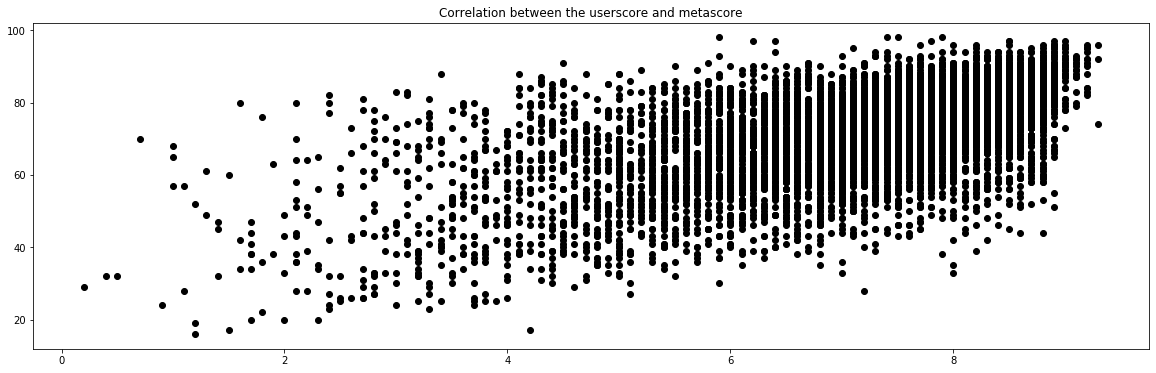

In [28]:
correlation_userscore_and_metascore = metacritic_games_df.\
filter(items=['game','userscore','metascore']).\
sort_values(by=['metascore'], ascending=False).drop_duplicates().sample(8000)

correlation_userscore_and_metascore

x = correlation_userscore_and_metascore['userscore']

y = correlation_userscore_and_metascore['metascore']

plt.rcParams['figure.figsize'] = (20,6)

plt.plot(x, y, 'o', color='black');

plt.title('Correlation between the userscore and metascore')

plt.show()


As we can see, there a postive but not strong correlation between that two fields. 

We can see this in pratice in the search bellow, when a game receive a great score on metacritics but the the user's ranks is so low 

In [29]:
metacritic_games_df.\
filter(items=['game','userscore','metascore']).\
sort_values(by=['metascore','userscore'], ascending=[False,True]).\
drop_duplicates()[:20]

,game,userscore,metascore
200,Red Dead Redemption 2,5.9,98
1400,Tony Hawk's Pro Skater 2,7.4,98
1300,Grand Theft Auto IV,7.5,98
1301,Grand Theft Auto IV,7.9,98
1401,Tony Hawk's Pro Skater 2,6.2,97
1403,NFL 2K1,6.4,97
1000,Tony Hawk's Pro Skater 3,7.5,97
201,Red Dead Redemption 2,7.7,97
56,Grand Theft Auto V,7.8,97
0,Grand Theft Auto V,8.3,97


## Most Rentable Games

In this analyze, i'm using the userscore as the primary classifier and the release date as secound, to see games with high score from the users but try to recomend games thet was launched recently.

In [30]:
merge_dataframe.drop_duplicates(subset="game").\
filter(items=['game','userscore','metascore','price','release_date']).\
sort_values(by=['userscore','release_date','metascore','price'], 
ascending=[False,False,False,False])[:20]

,game,userscore,metascore,price,release_date
305,The Witcher 3: Wild Hunt,9.3,93,39.99,2015-05-18
1006,The Evil Within 2,9.2,82,59.99,2017-10-13
1129,Vanquish,9.2,84,19.99,2010-10-19
585,Portal,9.2,90,9.99,2007-10-10
565,Team Fortress 2,9.1,92,NaN,2007-10-10
586,Half-Life 2: Episode Two,9.1,90,7.99,2007-10-10
1231,Day of Defeat: Source,9.1,80,9.99,2005-09-26
636,Half-Life 2,9.1,96,9.99,2004-11-16
649,Tales of Symphonia,9.1,86,19.99,2004-07-13
522,Max Payne,9.1,89,9.99,2001-07-23
